In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(argparser)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(cowplot)))
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer)))
suppressPackageStartupMessages(suppressWarnings(library(patchwork)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
suppressPackageStartupMessages(suppressWarnings(library(arrow)))

# load in theme
source("../../utils/figure_themes.r")

In [2]:
cell_type <- "PBMC"

## mAP results

In [3]:
# set path to the data morphology

morphology_path <- file.path("..","..","..","9.mAP","data","processed","mAP_scores","morphology","activity_map.parquet")
shuffled_morphology_path <- file.path("..","..","..","9.mAP","data","processed","mAP_scores","morphology","activity_map_shuffled.parquet")
# set path to the secretome data

secretome_path <- file.path("..","..","..","9.mAP","data","processed","mAP_scores","secretome","activity_map.parquet")
shuffled_secretome_path <- file.path("..","..","..","9.mAP","data","processed","mAP_scores","secretome","activity_map_shuffled.parquet")

df_morphology <- arrow::read_parquet(morphology_path) %>% 
    dplyr::mutate(shuffled = "Non-shuffled") %>%
    dplyr::mutate(data_type = "Morphology") %>%
    # rename the mean_average_precision column to specifcy morphology
    # drop unnecessary columns
    dplyr::select(-c("Metadata_reference_index", "indices", "p_value", "corrected_p_value", "below_p", "below_corrected_p","-log10(p-value)"))	

df_shuffled_morphology <- arrow::read_parquet(shuffled_morphology_path) %>%
    dplyr::mutate(shuffled = "Shuffled") %>%
    dplyr::mutate(data_type = "Morphology") %>%
    # rename the mean_average_precision column to specifcy morphology
    dplyr::select(-c("Metadata_reference_index", "indices", "p_value", "corrected_p_value", "below_p", "below_corrected_p","-log10(p-value)"))	


df_secretome <- arrow::read_parquet(secretome_path) %>%
    dplyr::mutate(shuffled = "Non-shuffled") %>%
    dplyr::mutate(data_type = "Secretome") %>%
    # rename the mean_average_precision column to specifcy secretome
    dplyr::select(-c("Metadata_reference_index", "indices", "p_value", "corrected_p_value", "below_p", "below_corrected_p","-log10(p-value)"))	


df_shuffled_secretome <- arrow::read_parquet(shuffled_secretome_path) %>%
    dplyr::mutate(shuffled = "Shuffled") %>%
    dplyr::mutate(data_type = "Secretome") %>%
    # rename the mean_average_precision column to specifcy secretome
    dplyr::select(-c("Metadata_reference_index", "indices", "p_value", "corrected_p_value", "below_p", "below_corrected_p","-log10(p-value)"))	

df <- dplyr::bind_rows(df_morphology, df_shuffled_morphology, df_secretome, df_shuffled_secretome)
head(df)

Metadata_Treatment,Metadata_labels,mean_average_precision,shuffled,data_type
<chr>,<chr>,<dbl>,<chr>,<chr>
DMSO_0.100_%_DMSO_1.000_%,Control,0.9125000,Non-shuffled,Morphology
DMSO_0.100_%_Z-VAD-FMK_100.000_uM,Control,0.9097222,Non-shuffled,Morphology
DMSO_0.100_%_Z-VAD-FMK_30.000_uM,Control,0.8750000,Non-shuffled,Morphology
Disulfiram_0.100_uM_DMSO_0.025_%,Control,0.4178662,Non-shuffled,Morphology
Disulfiram_1.000_uM_DMSO_0.025_%,Control,0.4313672,Non-shuffled,Morphology
Disulfiram_2.500_uM_DMSO_0.025_%,Control,0.4289863,Non-shuffled,Morphology


In [4]:
levels_list <- c(
    'Media',
    'DMSO_0.100_%_DMSO_0.025_%',
    'DMSO_0.100_%_DMSO_1.000_%',
    'DMSO_0.100_%_Z-VAD-FMK_30.000_uM',
    'DMSO_0.100_%_Z-VAD-FMK_100.000_uM',

    'Disulfiram_0.100_uM_DMSO_0.025_%',
    'Disulfiram_1.000_uM_DMSO_0.025_%',
    'Disulfiram_2.500_uM_DMSO_0.025_%',
    
    'Flagellin_0.100_ug_per_ml_DMSO_0.025_%',
    'Flagellin_1.000_ug_per_ml_DMSO_0.025_%',
    'Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM',
    
    'LPS_0.010_ug_per_ml_DMSO_0.025_%',
    'LPS_0.100_ug_per_ml_DMSO_0.025_%',
    'LPS_1.000_ug_per_ml_DMSO_0.025_%',

    'LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM',
    'LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM',

    'LPS_10.000_ug_per_ml_DMSO_0.025_%',
    'LPS_10.000_ug_per_ml_Disulfiram_0.100_uM',
    'LPS_10.000_ug_per_ml_Disulfiram_1.000_uM',
    'LPS_10.000_ug_per_ml_Disulfiram_2.500_uM',
    'LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM',
    
    'LPS_100.000_ug_per_ml_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%',
    'LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%',

    'H2O2_100.000_nM_DMSO_0.025_%',
    'H2O2_100.000_uM_DMSO_0.025_%',
    'H2O2_100.000_uM_Disulfiram_1.000_uM',
    'H2O2_100.000_uM_Z-VAD-FMK_100.000_uM',
    'Thapsigargin_1.000_uM_DMSO_0.025_%',
    'Thapsigargin_10.000_uM_DMSO_0.025_%',

    'Topotecan_5.000_nM_DMSO_0.025_%',  
    'Topotecan_10.000_nM_DMSO_0.025_%',
    'Topotecan_20.000_nM_DMSO_0.025_%'
)

## Clean the class data

In [5]:
# split out the morphology and secretome data
morphology_data <- df %>% dplyr::filter(data_type == "Morphology")
secretome_data <- df %>% dplyr::filter(data_type == "Secretome")
# rename the mean_average_precision column to specifcy morphology
morphology_data <- morphology_data %>% dplyr::rename(mAP_moprhology = mean_average_precision)
secretome_data <- secretome_data %>% dplyr::rename(mAP_secretome = mean_average_precision)
# drop the data_type column
morphology_data <- morphology_data %>% dplyr::select(-data_type)
secretome_data <- secretome_data %>% dplyr::select(-data_type)
# merge the data together to plot 
df <- merge(morphology_data, secretome_data,by = c("Metadata_Treatment", "Metadata_labels", "shuffled"))


In [6]:
df$Metadata_labels <- factor(df$Metadata_labels, levels = c("Control", "Apoptosis", "Pyroptosis"))
# df$Metadata_Treatment <- factor(df$Metadata_Treatment, levels =levels_list)

## mAP Scatter compare plot

In [7]:
length(unique(df$Metadata_Treatment))
unique(df$Metadata_Treatment)
df <- df %>%
    mutate(Metadata_Treatment = case_when(
        Metadata_Treatment =='DMSO_0.100_%_DMSO_0.025_%' ~ "DMSO 0.1% - DMSO 0.025%",
        Metadata_Treatment =='DMSO_0.100_%_DMSO_1.000_%' ~ "DMSO 0.1% - DMSO 1.0%",
        Metadata_Treatment =='DMSO_0.100_%_Z-VAD-FMK_100.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 100.0 uM",
        Metadata_Treatment =='DMSO_0.100_%_Z-VAD-FMK_30.000_uM' ~ "DMSO 0.1% - Z-VAD-FMK 30.0 uM",
        Metadata_Treatment =='Flagellin_1.000_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM' ~ "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM",
        Metadata_Treatment =='LPS_0.010_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.01 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='LPS_0.100_ug_per_ml_DMSO_0.025_%' ~ "LPS 0.1 ug/ml - DMSO 0.025%",
        # Metadata_Treatment =='Flagellin_0.100_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.0%",
        Metadata_Treatment =='Flagellin_0.100_ug_per_ml_DMSO_0.025_%' ~ "Flagellin 0.1 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='Disulfiram_0.100_uM_DMSO_0.025_%' ~ "Disulfiram 0.1 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM",
        Metadata_Treatment =='LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM' ~ "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM",
        Metadata_Treatment =='LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_1.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 1.0 ug/ml - DMSO 0.025%",
        # Metadata_Treatment =='Flagellin_1.000_ug_per_ml_DMSO_0.0_%' ~ "Flagellin 1.0 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='Disulfiram_1.000_uM_DMSO_0.025_%' ~ "Disulfiram 1.0 uM - DMSO 0.025%",
        Metadata_Treatment =='Thapsigargin_1.000_uM_DMSO_0.025_%' ~ "Thapsigargin 1.0 uM - DMSO 0.025%",
        Metadata_Treatment =='Topotecan_10.000_nM_DMSO_0.025_%' ~ "Topotecan 10.0 nM - DMSO 0.025%",
        Metadata_Treatment =='LPS_10.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 10.0 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='LPS_10.000_ug_per_ml_Disulfiram_0.100_uM' ~ "LPS 10.0 ug/ml - Disulfiram 0.1 uM",
        Metadata_Treatment =='LPS_10.000_ug_per_ml_Disulfiram_1.000_uM' ~ "LPS 10.0 ug/ml - Disulfiram 1.0 uM",
        Metadata_Treatment =='LPS_10.000_ug_per_ml_Disulfiram_2.500_uM' ~ "LPS 10.0 ug/ml - Disulfiram 2.5 uM",
        Metadata_Treatment =='LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM' ~ "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM",
        Metadata_Treatment =='Thapsigargin_10.000_uM_DMSO_0.025_%' ~ "Thapsigargin 10.0 uM - DMSO 0.025%",
        Metadata_Treatment =='H2O2_100.000_nM_DMSO_0.025_%' ~ "H2O2 100.0 nM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%' ~ "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%",
        Metadata_Treatment =='LPS_100.000_ug_per_ml_DMSO_0.025_%' ~ "LPS 100.0 ug/ml - DMSO 0.025%",
        Metadata_Treatment =='H2O2_100.000_uM_DMSO_0.025_%' ~ "H2O2 100.0 uM - DMSO 0.025%",
        Metadata_Treatment =='H2O2_100.000_uM_Disulfiram_1.000_uM' ~ "H2O2 100.0 uM - Disulfiram 1.0 uM",
        Metadata_Treatment =='H2O2_100.000_uM_Z-VAD-FMK_100.000_uM' ~ "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM",
        Metadata_Treatment =='Disulfiram_2.500_uM_DMSO_0.025_%' ~ "Disulfiram 2.5 uM - DMSO 0.025%",
        Metadata_Treatment =='Topotecan_20.000_nM_DMSO_0.025_%' ~ "Topotecan 20.0 nM - DMSO 0.025%",
        Metadata_Treatment =='Topotecan_5.000_nM_DMSO_0.025_%' ~ "Topotecan 5.0 nM - DMSO 0.025%",
        Metadata_Treatment =='Media' ~ "Media",
        # Metadata_Treatment =='media_ctr_0.0_0_Media_ctr_0.0_0' ~ "Media",
        # Metadata_Treatment =='media_ctr_0.0_0_Media_0.0_0' ~ "Media"
    ))
    # replace Media ctr 0.0 0 with Media
length(unique(df$Metadata_Treatment))

unique(df$Metadata_Treatment)

[1] 36

[1] "Disulfiram_0.100_uM_DMSO_0.025_%"                            
 [2] "Disulfiram_1.000_uM_DMSO_0.025_%"                            
 [3] "Disulfiram_2.500_uM_DMSO_0.025_%"                            
 [4] "DMSO_0.100_%_DMSO_1.000_%"                                   
 [5] "DMSO_0.100_%_Z-VAD-FMK_100.000_uM"                           
 [6] "DMSO_0.100_%_Z-VAD-FMK_30.000_uM"                            
 [7] "Flagellin_0.100_ug_per_ml_DMSO_0.025_%"                      
 [8] "Flagellin_1.000_ug_per_ml_Disulfiram_1.000_uM"               
 [9] "Flagellin_1.000_ug_per_ml_DMSO_0.025_%"                      
[10] "H2O2_100.000_nM_DMSO_0.025_%"                                
[11] "H2O2_100.000_uM_Disulfiram_1.000_uM"                         
[12] "H2O2_100.000_uM_DMSO_0.025_%"                                
[13] "H2O2_100.000_uM_Z-VAD-FMK_100.000_uM"                        
[14] "LPS_0.010_ug_per_ml_DMSO_0.025_%"                            
[15] "LPS_0.100_ug_per_ml_DMSO_0.025_%"                            
[16] "LPS_1.000_ug_per_ml_DMSO_0.025_%"                            
[17] "LPS_10.000_ug_per_ml_Disulfiram_0.100_uM"                    
[18] "LPS_10.000_ug_per_ml_Disulfiram_1.000_uM"                    
[19] "LPS_10.000_ug_per_ml_Disulfiram_2.500_uM"                    
[20] "LPS_10.000_ug_per_ml_DMSO_0.025_%"                           
[21] "LPS_10.000_ug_per_ml_Z-VAD-FMK_100.000_uM"                   
[22] "LPS_100.000_ug_per_ml_DMSO_0.025_%"                          
[23] "LPS_Nigericin_1.000_ug_per_ml_1.000_uM_DMSO_0.025_%"         
[24] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Disulfiram_1.000_uM" 
[25] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_DMSO_0.025_%"        
[26] "LPS_Nigericin_1.000_ug_per_ml_10.000_uM_Z-VAD-FMK_100.000_uM"
[27] "LPS_Nigericin_1.000_ug_per_ml_3.000_uM_DMSO_0.025_%"         
[28] "LPS_Nigericin_100.000_ug_per_ml_1.000_uM_DMSO_0.025_%"       
[29] "LPS_Nigericin_100.000_ug_per_ml_10.000_uM_DMSO_0.025_%"      
[30] "LPS_Nigericin_100.000_ug_per_ml_3.000_uM_DMSO_0.025_%"       
[31] "Media"                                                       
[32] "Thapsigargin_1.000_uM_DMSO_0.025_%"                          
[33] "Thapsigargin_10.000_uM_DMSO_0.025_%"                         
[34] "Topotecan_10.000_nM_DMSO_0.025_%"                            
[35] "Topotecan_20.000_nM_DMSO_0.025_%"                            
[36] "Topotecan_5.000_nM_DMSO_0.025_%"

[1] 36

[1] "Disulfiram 0.1 uM - DMSO 0.025%"                       
 [2] "Disulfiram 1.0 uM - DMSO 0.025%"                       
 [3] "Disulfiram 2.5 uM - DMSO 0.025%"                       
 [4] "DMSO 0.1% - DMSO 1.0%"                                 
 [5] "DMSO 0.1% - Z-VAD-FMK 100.0 uM"                        
 [6] "DMSO 0.1% - Z-VAD-FMK 30.0 uM"                         
 [7] "Flagellin 0.1 ug/ml - DMSO 0.025%"                     
 [8] "Flagellin 1.0 ug/ml - Disulfiram 1.0 uM"               
 [9] "Flagellin 1.0 ug/ml - DMSO 0.025%"                     
[10] "H2O2 100.0 nM - DMSO 0.025%"                           
[11] "H2O2 100.0 uM - Disulfiram 1.0 uM"                     
[12] "H2O2 100.0 uM - DMSO 0.025%"                           
[13] "H2O2 100.0 uM - Z-VAD-FMK 100.0 uM"                    
[14] "LPS 0.01 ug/ml - DMSO 0.025%"                          
[15] "LPS 0.1 ug/ml - DMSO 0.025%"                           
[16] "LPS 1.0 ug/ml - DMSO 0.025%"                           
[17] "LPS 10.0 ug/ml - Disulfiram 0.1 uM"                    
[18] "LPS 10.0 ug/ml - Disulfiram 1.0 uM"                    
[19] "LPS 10.0 ug/ml - Disulfiram 2.5 uM"                    
[20] "LPS 10.0 ug/ml - DMSO 0.025%"                          
[21] "LPS 10.0 ug/ml - Z-VAD-FMK 100.0 uM"                   
[22] "LPS 100.0 ug/ml - DMSO 0.025%"                         
[23] "LPS 1.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"        
[24] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Disulfiram 1.0 uM" 
[25] "LPS 1.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"       
[26] "LPS 1.0 ug/ml + Nigericin 10.0 uM - Z-VAD-FMK 100.0 uM"
[27] "LPS 1.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"        
[28] "LPS 100.0 ug/ml + Nigericin 1.0 uM - DMSO 0.025%"      
[29] "LPS 100.0 ug/ml + Nigericin 10.0 uM - DMSO 0.025%"     
[30] "LPS 100.0 ug/ml + Nigericin 3.0 uM - DMSO 0.025%"      
[31] "Media"                                                 
[32] "Thapsigargin 1.0 uM - DMSO 0.025%"                     
[33] "Thapsigargin 10.0 uM - DMSO 0.025%"                    
[34] "Topotecan 10.0 nM - DMSO 0.025%"                       
[35] "Topotecan 20.0 nM - DMSO 0.025%"                       
[36] "Topotecan 5.0 nM - DMSO 0.025%"

In [8]:

# split the Metadata_Treatment into two columns by the " - " delimiter
df <- df %>%
    separate(Metadata_Treatment, c("inducer", "inhibitor"), sep = " - ", remove = FALSE)

unique(df$inducer)
# replace the inhibitor NA with Media
df$inhibitor <- ifelse(is.na(df$inhibitor), "Media", df$inhibitor)
unique(df$inhibitor)

# make the group_treatment column a factor
df$inducer <- factor(
    df$inducer,
    levels = c(
        'Media',
        'DMSO 0.1%',
        'Flagellin 0.1 ug/ml',
        'Flagellin 1.0 ug/ml',
        'LPS 0.01 ug/ml',
        'LPS 0.1 ug/ml',
        'LPS 1.0 ug/ml',
        'LPS 10.0 ug/ml',
        'LPS 100.0 ug/ml',
        'LPS 1.0 ug/ml + Nigericin 1.0 uM',
        'LPS 1.0 ug/ml + Nigericin 3.0 uM',
        'LPS 1.0 ug/ml + Nigericin 10.0 uM',
        'LPS 100.0 ug/ml + Nigericin 1.0 uM',
        'LPS 100.0 ug/ml + Nigericin 3.0 uM',
        'LPS 100.0 ug/ml + Nigericin 10.0 uM',
        'H2O2 100.0 nM',
        'H2O2 100.0 uM',
        'Disulfiram 0.1 uM',
        'Disulfiram 1.0 uM',
        'Disulfiram 2.5 uM',
        'Thapsigargin 1.0 uM',
        'Thapsigargin 10.0 uM',
        'Topotecan 5.0 nM',
        'Topotecan 10.0 nM',
        'Topotecan 20.0 nM'
    )
)

# make the group_treatment column a factor
df$inhibitor <- factor(
    df$inhibitor,
    levels = c(
        'Media',
        'DMSO 0.025%',
        'DMSO 1.0%',

        'Disulfiram 0.1 uM',
        'Disulfiram 1.0 uM',
        'Disulfiram 2.5 uM',

        'Z-VAD-FMK 30.0 uM',
        'Z-VAD-FMK 100.0 uM'
    )
)
head(df)
unique(df$inducer)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 3 rows [73, 74, 75].”


[1] "Disulfiram 0.1 uM"                   "Disulfiram 1.0 uM"                  
 [3] "Disulfiram 2.5 uM"                   "DMSO 0.1%"                          
 [5] "Flagellin 0.1 ug/ml"                 "Flagellin 1.0 ug/ml"                
 [7] "H2O2 100.0 nM"                       "H2O2 100.0 uM"                      
 [9] "LPS 0.01 ug/ml"                      "LPS 0.1 ug/ml"                      
[11] "LPS 1.0 ug/ml"                       "LPS 10.0 ug/ml"                     
[13] "LPS 100.0 ug/ml"                     "LPS 1.0 ug/ml + Nigericin 1.0 uM"   
[15] "LPS 1.0 ug/ml + Nigericin 10.0 uM"   "LPS 1.0 ug/ml + Nigericin 3.0 uM"   
[17] "LPS 100.0 ug/ml + Nigericin 1.0 uM"  "LPS 100.0 ug/ml + Nigericin 10.0 uM"
[19] "LPS 100.0 ug/ml + Nigericin 3.0 uM"  "Media"                              
[21] "Thapsigargin 1.0 uM"                 "Thapsigargin 10.0 uM"               
[23] "Topotecan 10.0 nM"                   "Topotecan 20.0 nM"                  
[25] "Topotecan 5.0 nM"

[1] "DMSO 0.025%"        "DMSO 1.0%"          "Z-VAD-FMK 100.0 uM"
[4] "Z-VAD-FMK 30.0 uM"  "Disulfiram 1.0 uM"  "Disulfiram 0.1 uM" 
[7] "Disulfiram 2.5 uM"  "Media"

,Metadata_Treatment,inducer,inhibitor,Metadata_labels,shuffled,mAP_moprhology,mAP_secretome
,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
1,Disulfiram 0.1 uM - DMSO 0.025%,Disulfiram 0.1 uM,DMSO 0.025%,Control,Non-shuffled,0.4178662,0.4012085
2,Disulfiram 0.1 uM - DMSO 0.025%,Disulfiram 0.1 uM,DMSO 0.025%,Control,Shuffled,0.4527778,0.5000000
3,Disulfiram 1.0 uM - DMSO 0.025%,Disulfiram 1.0 uM,DMSO 0.025%,Control,Non-shuffled,0.4313672,0.5312500
4,Disulfiram 1.0 uM - DMSO 0.025%,Disulfiram 1.0 uM,DMSO 0.025%,Control,Shuffled,0.4088294,0.3125000
5,Disulfiram 1.0 uM - DMSO 0.025%,Disulfiram 1.0 uM,DMSO 0.025%,Control,Shuffled,0.4088294,0.6000000
6,Disulfiram 2.5 uM - DMSO 0.025%,Disulfiram 2.5 uM,DMSO 0.025%,Control,Non-shuffled,0.4289863,0.5597222


[1] Disulfiram 0.1 uM                   Disulfiram 1.0 uM                  
 [3] Disulfiram 2.5 uM                   DMSO 0.1%                          
 [5] Flagellin 0.1 ug/ml                 Flagellin 1.0 ug/ml                
 [7] H2O2 100.0 nM                       H2O2 100.0 uM                      
 [9] LPS 0.01 ug/ml                      LPS 0.1 ug/ml                      
[11] LPS 1.0 ug/ml                       LPS 10.0 ug/ml                     
[13] LPS 100.0 ug/ml                     LPS 1.0 ug/ml + Nigericin 1.0 uM   
[15] LPS 1.0 ug/ml + Nigericin 10.0 uM   LPS 1.0 ug/ml + Nigericin 3.0 uM   
[17] LPS 100.0 ug/ml + Nigericin 1.0 uM  LPS 100.0 ug/ml + Nigericin 10.0 uM
[19] LPS 100.0 ug/ml + Nigericin 3.0 uM  Media                              
[21] Thapsigargin 1.0 uM                 Thapsigargin 10.0 uM               
[23] Topotecan 10.0 nM                   Topotecan 20.0 nM                  
[25] Topotecan 5.0 nM                   
25 Levels: Media DMSO 0.1% Flagellin 0.1 ug/ml ... Topotecan 20.0 nM

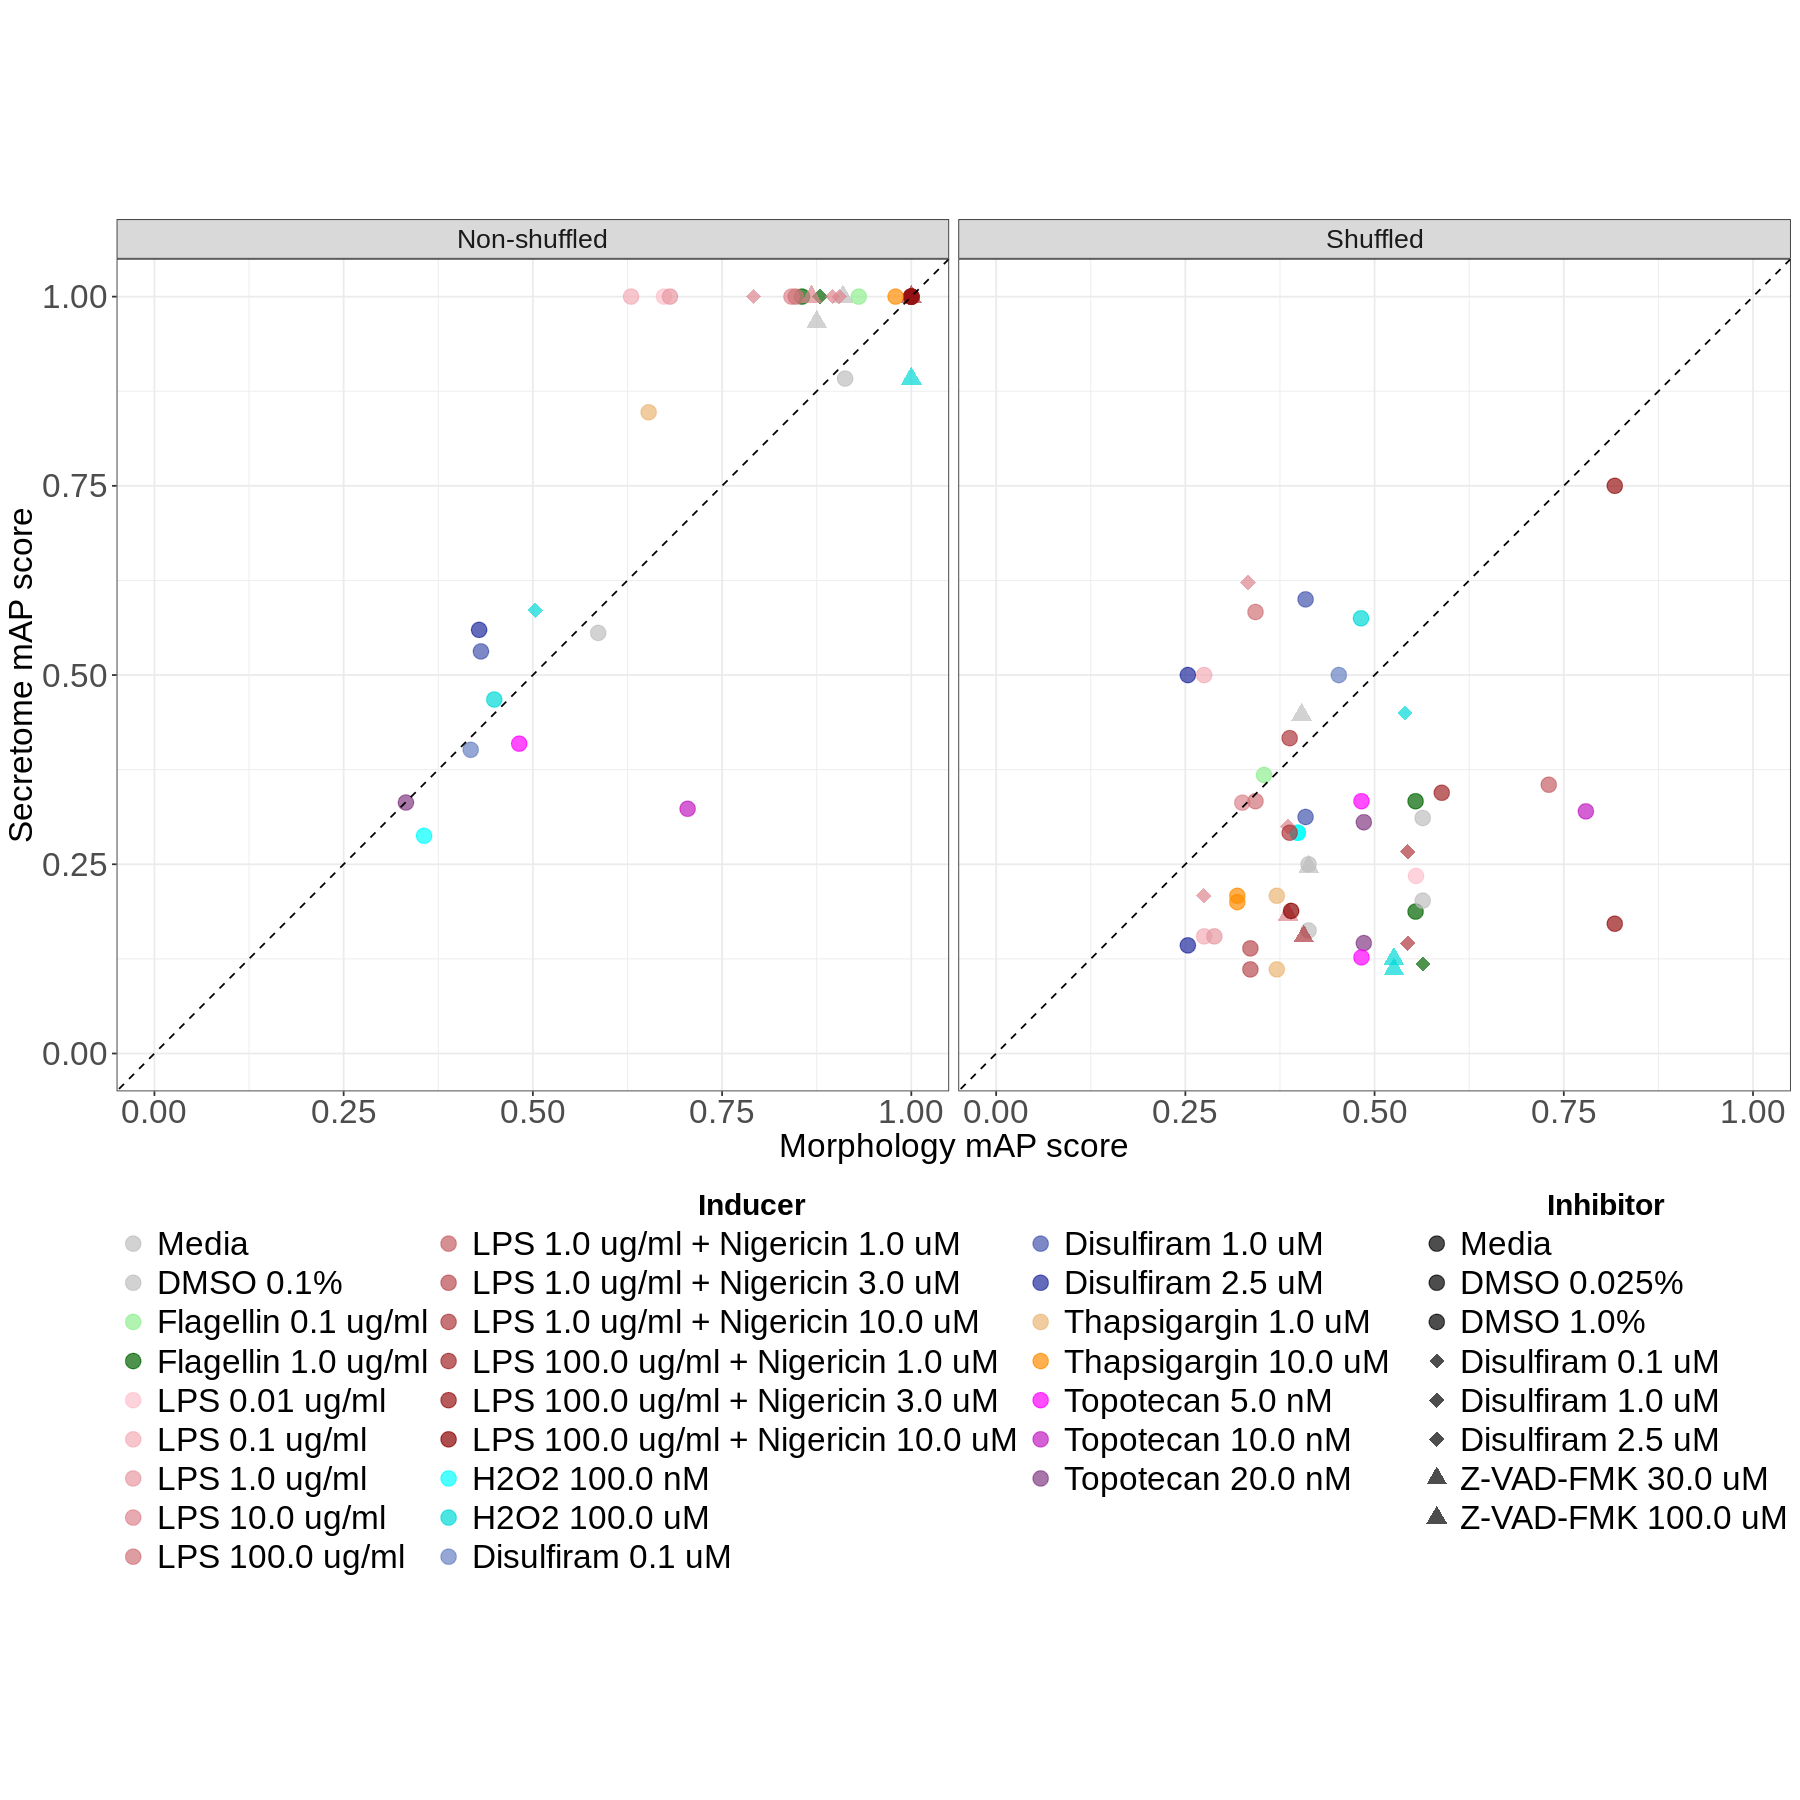

In [9]:
width <- 15
height <- 15
options(repr.plot.width=width, repr.plot.height=height)
# scatter plot with fill being the treatment dose
scatter_by_treatment <- (
    ggplot(df, aes(x=mAP_moprhology, y=mAP_secretome, col = inducer, shape=inhibitor))
    + geom_point(size=4, alpha=0.7)
    + labs(x="Morphology mAP score", y="Secretome mAP score")
    + theme_bw()
    + ylim(0,1)
    + xlim(0,1)
    + figure_theme
    # Change the legend title
    # change the legend shape
    + scale_color_manual(
        name = "Inducer",
        labels = c(
            'Media',
            'DMSO 0.1%',

            'Flagellin 0.1 ug/ml',
            'Flagellin 1.0 ug/ml',

            'LPS 0.01 ug/ml',
            'LPS 0.1 ug/ml',
            'LPS 1.0 ug/ml',
            'LPS 10.0 ug/ml',
            'LPS 100.0 ug/ml',

            'LPS 1.0 ug/ml + Nigericin 1.0 uM',
            'LPS 1.0 ug/ml + Nigericin 3.0 uM',
            'LPS 1.0 ug/ml + Nigericin 10.0 uM',

            'LPS 100.0 ug/ml + Nigericin 1.0 uM',
            'LPS 100.0 ug/ml + Nigericin 3.0 uM',
            'LPS 100.0 ug/ml + Nigericin 10.0 uM',

            'H2O2 100.0 nM',
            'H2O2 100.0 uM',

            'Disulfiram 0.1 uM',
            'Disulfiram 1.0 uM',
            'Disulfiram 2.5 uM',

            'Thapsigargin 1.0 uM',
            'Thapsigargin 10.0 uM',

            'Topotecan 5.0 nM',
            'Topotecan 10.0 nM',
            'Topotecan 20.0 nM'
        ),
        values = colors_5)
    + scale_shape_manual(
        name = "Inhibitor",
        labels = c(
            'Media',
            'DMSO 0.025%',
            'DMSO 1.0%',

            'Disulfiram 0.1 uM',
            'Disulfiram 1.0 uM',
            'Disulfiram 2.5 uM',

            'Z-VAD-FMK 30.0 uM',
            'Z-VAD-FMK 100.0 uM'

        ),
        values = shapes
    )
    # make the legend 1 column
    + guides(
        color = guide_legend(ncol = 3), 
        shape = guide_legend(ncol = 1))
    + ggplot2::coord_fixed()
    + facet_grid(~shuffled)
    + theme(
        legend.position = "bottom", 
        legend.title.position = "top", 
        legend.title = element_text(size = 18, hjust = 0.5,face = "bold")
    )
    # add y = x line
    + geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black")
)
scatter_by_treatment

## Patch the plots together

In [10]:
# if dir does not exist create it
if(!dir.exists("../figures")){
    dir.create("../figures")
}

png 
  2

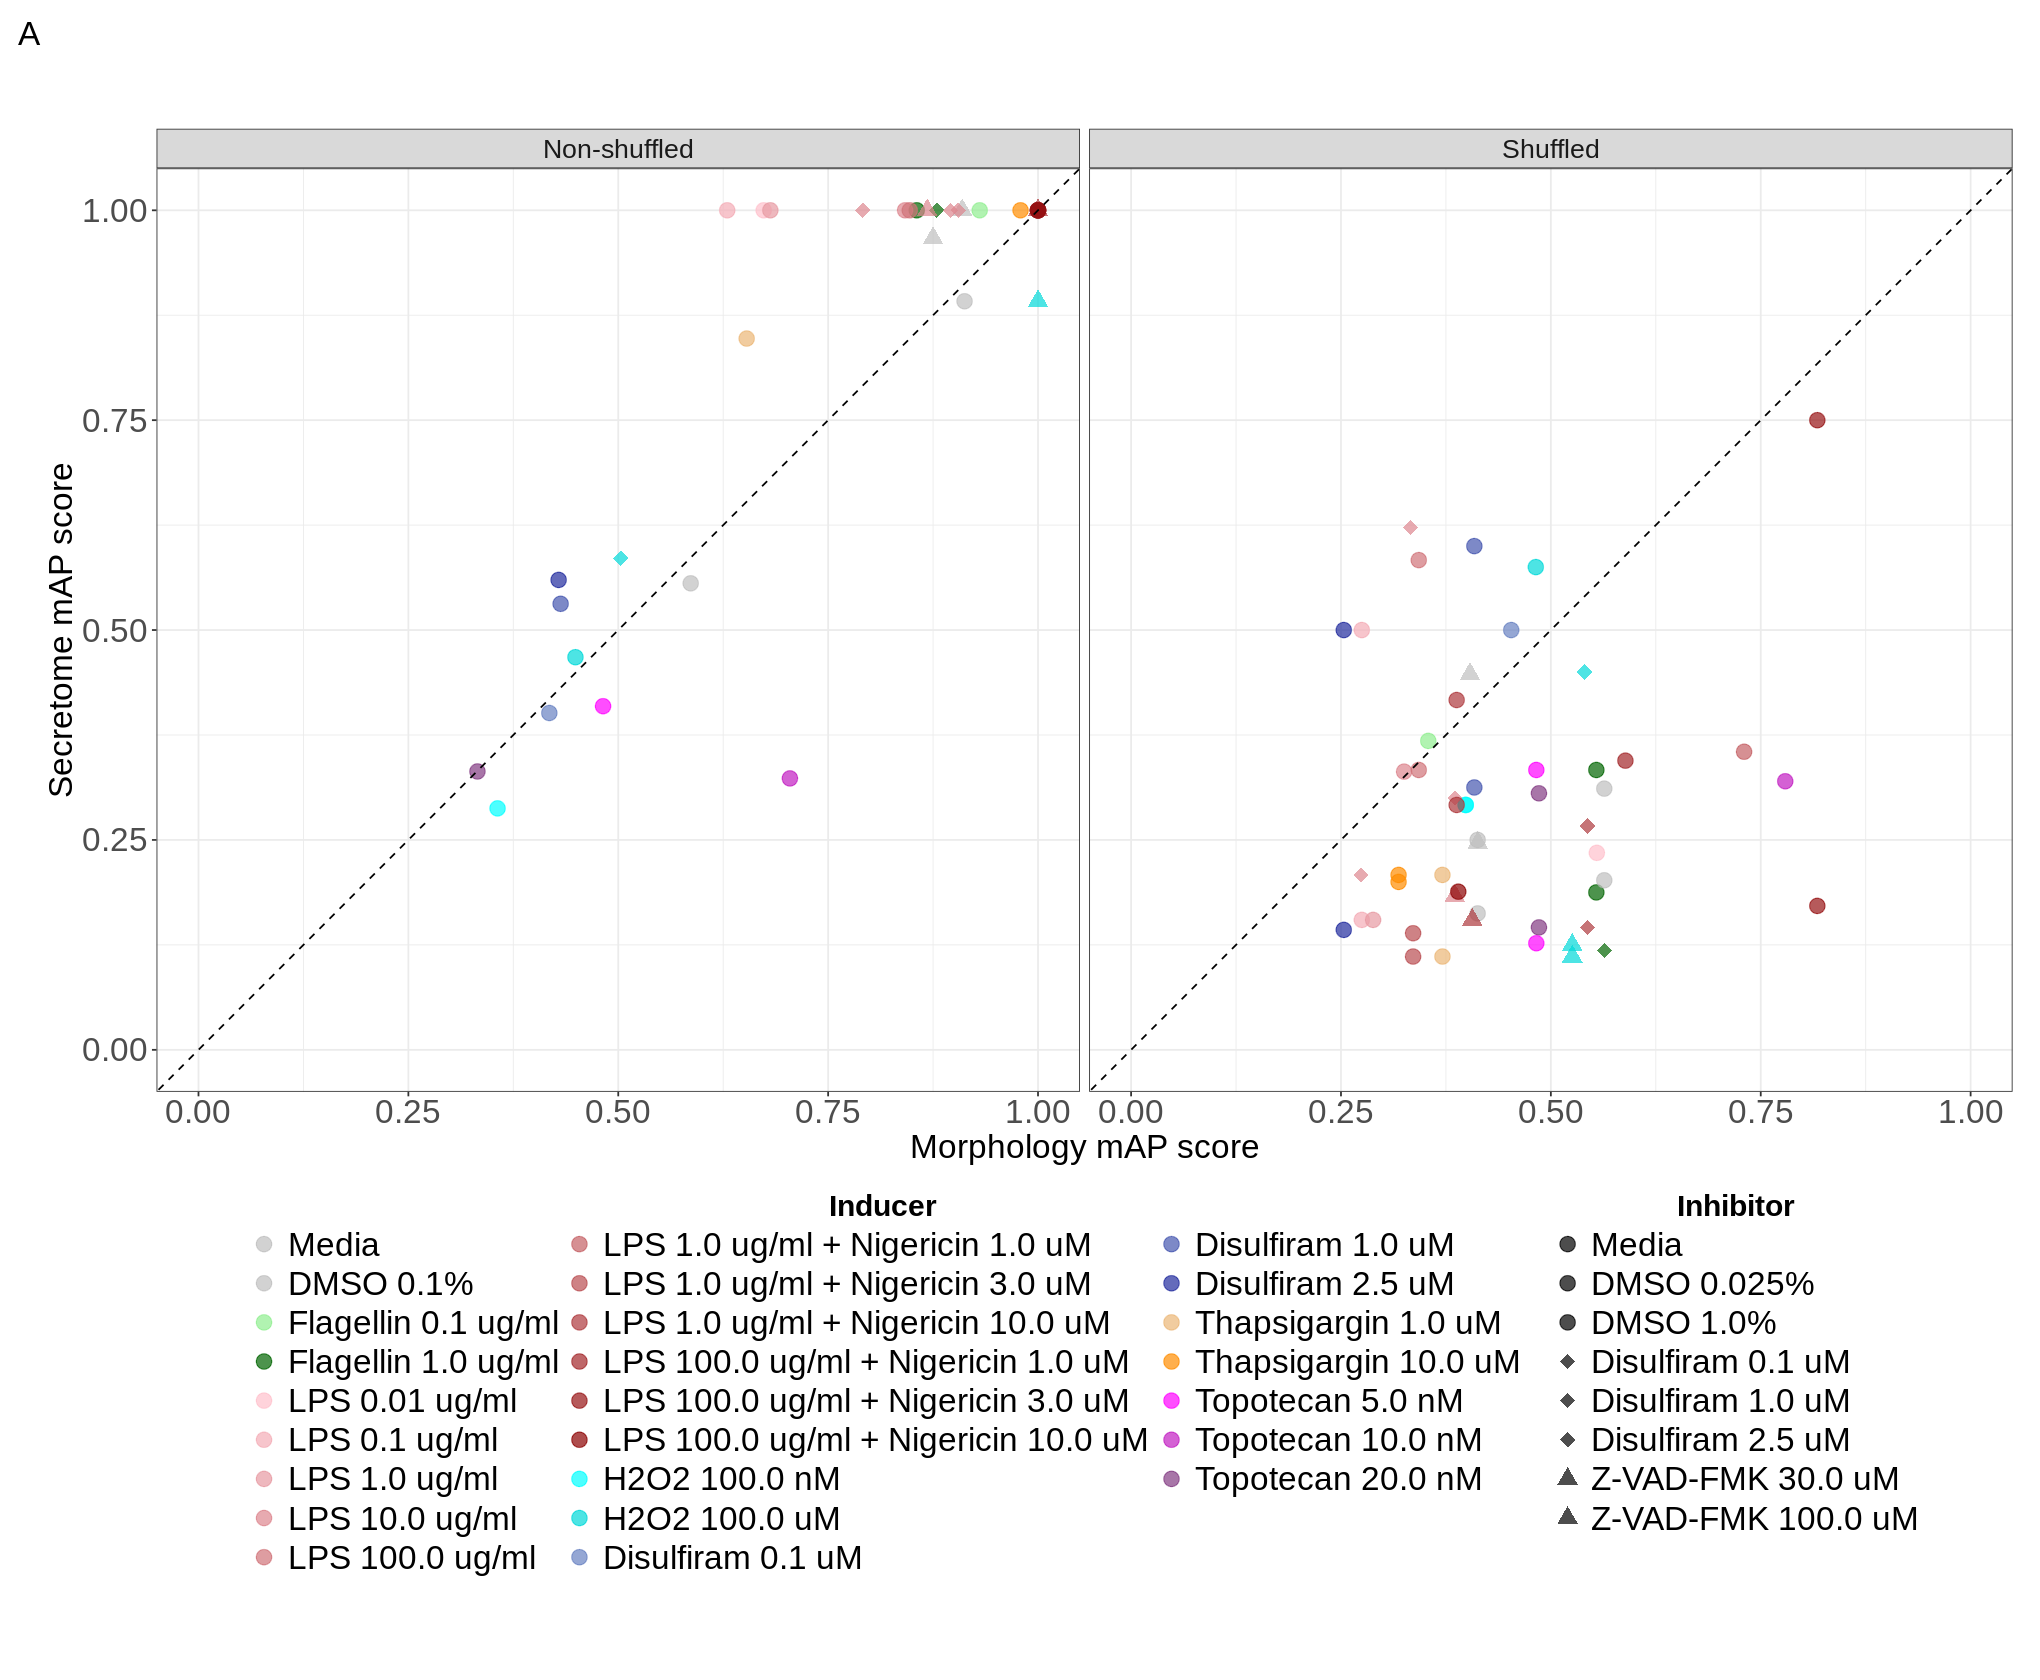

In [11]:
width <- 17
height <- 14
options(repr.plot.width = width, repr.plot.height = height)

layout <- c(
    area(t=1, b=2, l=1, r=2) # A
)


figure <- (
    # move the plot left a bit
    wrap_elements(scatter_by_treatment)
    + plot_layout(design = layout, heights = c(1, 0.5, 3))
    + plot_annotation(tag_levels = "A")  & theme(plot.tag = element_text(size = 20))

)

png(filename = file.path(paste0(
    "../", 
    "figures/",
    cell_type,
    "S8.png")), width = width, height = height, units = "in", res = 600
)
figure
dev.off()
figure
